In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from citipy import citipy

In [3]:
# Import the requests library
import requests
# Import the API key
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [64]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=key"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lufilufi
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | alghero
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | tigil
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | cap malheureux
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | nelson bay
Processing Record 14 of Set 1 | kununurra
Processing Record 15 of Set 1 | leningradskiy
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | talcahuano
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | walvis bay
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | punta arenas
Processing Record 24 of Set 1 | norman

Processing Record 45 of Set 4 | pangnirtung
Processing Record 46 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 4 | evensk
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | mahabaleshwar
Processing Record 1 of Set 5 | chapais
Processing Record 2 of Set 5 | yumen
Processing Record 3 of Set 5 | wad madani
Processing Record 4 of Set 5 | salo
Processing Record 5 of Set 5 | hondo
Processing Record 6 of Set 5 | souillac
Processing Record 7 of Set 5 | hualmay
Processing Record 8 of Set 5 | nadvoitsy
Processing Record 9 of Set 5 | houma
Processing Record 10 of Set 5 | pontefract
Processing Record 11 of Set 5 | yerbogachen
Processing Record 12 of Set 5 | muskegon
Processing Record 13 of Set 5 | baiyin
Processing Record 14 of Set 5 | nakhon nayok
Processing Record 15 of Set 5 | caceres
Processing Record 16 of Set 5 | hasaki
Processing Record 17 of Set 5 | attawapiskat
City not found. Skipping...
Processing 

Processing Record 33 of Set 8 | dingle
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | grand gaube
Processing Record 36 of Set 8 | wadena
Processing Record 37 of Set 8 | lagos de moreno
Processing Record 38 of Set 8 | tibacuy
Processing Record 39 of Set 8 | peshkovo
Processing Record 40 of Set 8 | macusani
Processing Record 41 of Set 8 | santa ana
Processing Record 42 of Set 8 | maniitsoq
Processing Record 43 of Set 8 | bankja
City not found. Skipping...
Processing Record 44 of Set 8 | bubaque
Processing Record 45 of Set 8 | pingliang
Processing Record 46 of Set 8 | sydney
Processing Record 47 of Set 8 | sao filipe
Processing Record 48 of Set 8 | samusu
City not found. Skipping...
Processing Record 49 of Set 8 | madisonville
Processing Record 50 of Set 8 | chandbali
Processing Record 1 of Set 9 | ust-kulom
Processing Record 2 of Set 9 | kirakira
Processing Record 3 of Set 9 | vung tau
Processing Record 4 of Set 9 | uruzgan
Processing Record 5 of Set 9 | cam

Processing Record 22 of Set 12 | wattegama
Processing Record 23 of Set 12 | praia
Processing Record 24 of Set 12 | lakota
Processing Record 25 of Set 12 | tawnat
City not found. Skipping...
Processing Record 26 of Set 12 | dipkarpaz
City not found. Skipping...
Processing Record 27 of Set 12 | santarem
Processing Record 28 of Set 12 | gizo
Processing Record 29 of Set 12 | paraiso
Processing Record 30 of Set 12 | camopi
Processing Record 31 of Set 12 | katherine
Processing Record 32 of Set 12 | plouzane
Processing Record 33 of Set 12 | ahipara
Processing Record 34 of Set 12 | miyako
Processing Record 35 of Set 12 | bowen
Processing Record 36 of Set 12 | khandbari
Processing Record 37 of Set 12 | imeni poliny osipenko
Processing Record 38 of Set 12 | henties bay
Processing Record 39 of Set 12 | pacific grove
Processing Record 40 of Set 12 | darhan
Processing Record 41 of Set 12 | bongaree
Processing Record 42 of Set 12 | atasu
Processing Record 43 of Set 12 | porto novo
Processing Record 

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lufilufi,-13.8745,-171.5986,87.80,79,20,11.50,WS,2021-04-24 21:21:40
1,Vardo,70.3705,31.1107,34.34,82,100,22.55,NO,2021-04-24 21:21:11
2,Alghero,40.5589,8.3181,53.60,82,0,2.30,IT,2021-04-24 21:21:40
3,Chokurdakh,70.6333,147.9167,-3.55,89,5,5.12,RU,2021-04-24 21:20:38
4,Cape Town,-33.9258,18.4232,62.01,88,0,6.91,ZA,2021-04-24 21:15:00
5,Tigil,57.8000,158.6667,29.77,95,100,4.05,RU,2021-04-24 21:21:41
6,Bengkulu,-3.8004,102.2655,75.13,88,100,3.36,ID,2021-04-24 21:20:48
7,Vila Velha,-20.3297,-40.2925,77.00,73,20,3.44,BR,2021-04-24 21:21:41
8,Cap Malheureux,-19.9842,57.6142,79.00,81,100,8.01,MU,2021-04-24 21:21:42
9,Bambous Virieux,-20.3428,57.7575,79.00,94,75,18.41,MU,2021-04-24 21:21:42


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lufilufi,WS,2021-04-24 21:21:40,-13.8745,-171.5986,87.80,79,20,11.50
1,Vardo,NO,2021-04-24 21:21:11,70.3705,31.1107,34.34,82,100,22.55
2,Alghero,IT,2021-04-24 21:21:40,40.5589,8.3181,53.60,82,0,2.30
3,Chokurdakh,RU,2021-04-24 21:20:38,70.6333,147.9167,-3.55,89,5,5.12
4,Cape Town,ZA,2021-04-24 21:15:00,-33.9258,18.4232,62.01,88,0,6.91
5,Tigil,RU,2021-04-24 21:21:41,57.8000,158.6667,29.77,95,100,4.05
6,Bengkulu,ID,2021-04-24 21:20:48,-3.8004,102.2655,75.13,88,100,3.36
7,Vila Velha,BR,2021-04-24 21:21:41,-20.3297,-40.2925,77.00,73,20,3.44
8,Cap Malheureux,MU,2021-04-24 21:21:42,-19.9842,57.6142,79.00,81,100,8.01
9,Bambous Virieux,MU,2021-04-24 21:21:42,-20.3428,57.7575,79.00,94,75,18.41


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

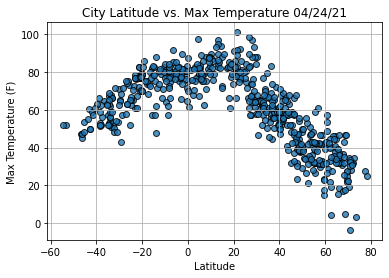

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

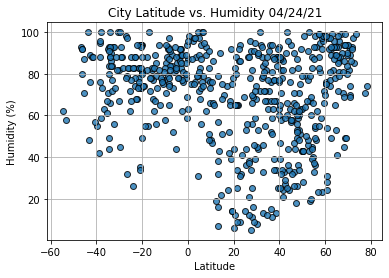

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

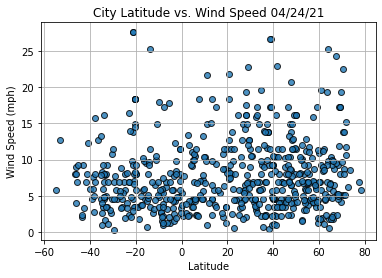

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                    Kununurra
Lat                      -15.7667
Lng                       128.733
Max Temp                     57.2
Humidity                       82
Cloudiness                      9
Wind Speed                   4.61
Country                        AU
Date          2021-04-24 21:21:43
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
583     True
584    False
585    False
586    False
587     True
Name: Lat, Length: 588, dtype: bool

In [31]:
# chain 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Vardo,70.3705,31.1107,34.34,82,100,22.55,NO,2021-04-24 21:21:11
2,Alghero,40.5589,8.3181,53.60,82,0,2.30,IT,2021-04-24 21:21:40
3,Chokurdakh,70.6333,147.9167,-3.55,89,5,5.12,RU,2021-04-24 21:20:38
5,Tigil,57.8000,158.6667,29.77,95,100,4.05,RU,2021-04-24 21:21:41
14,Leningradskiy,69.3833,178.4167,27.12,84,100,5.08,RU,2021-04-24 21:21:44


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

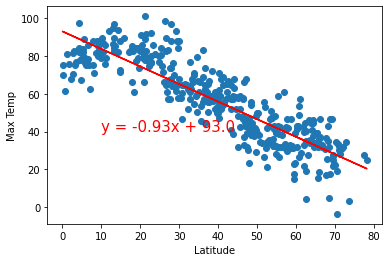

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

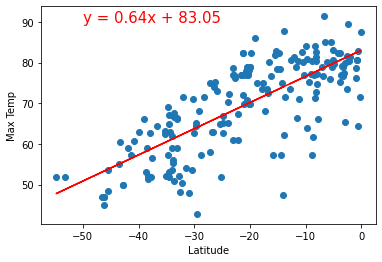

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

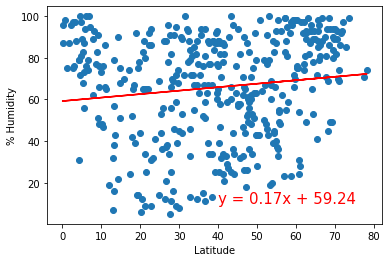

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


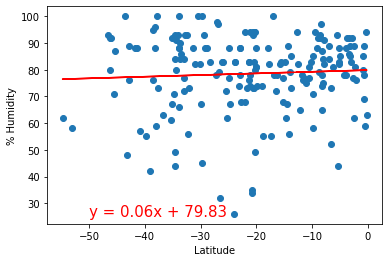

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))

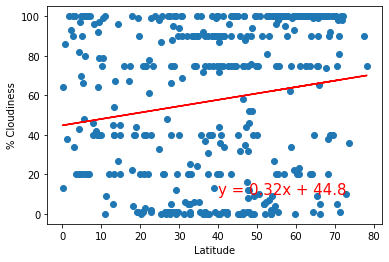

In [58]:
# Skill Drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40, 10))


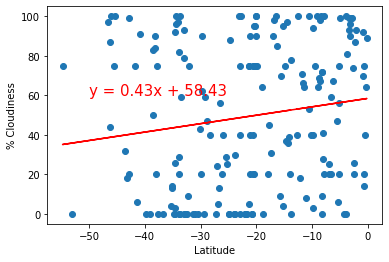

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

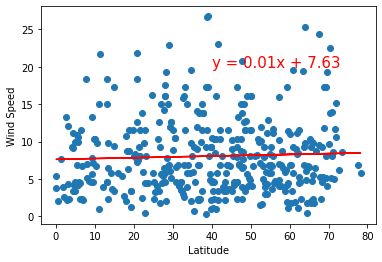

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,20))

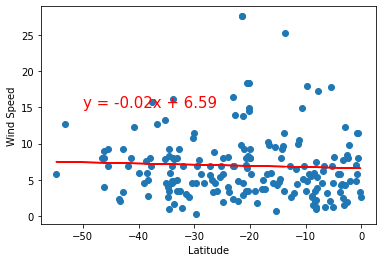

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))